In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
# Load dataset
df = pd.read_csv("data123.csv")

# Display first few rows
df.head()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [3]:
# Shape of the data
print("Shape of dataset:", df.shape)

# Column info
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Unique values in each column
df.nunique()


Shape of dataset: (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Tenure                        36
WarehouseToHome               33
NumberOfDeviceRegistered       6
PreferedOrderCat               6
SatisfactionScore              5
MaritalStatus                  3
NumberOfAddress               14
Complain                       2
DaySinceLastOrder             22
CashbackAmount              2335
Churn                          2
dtype: int64

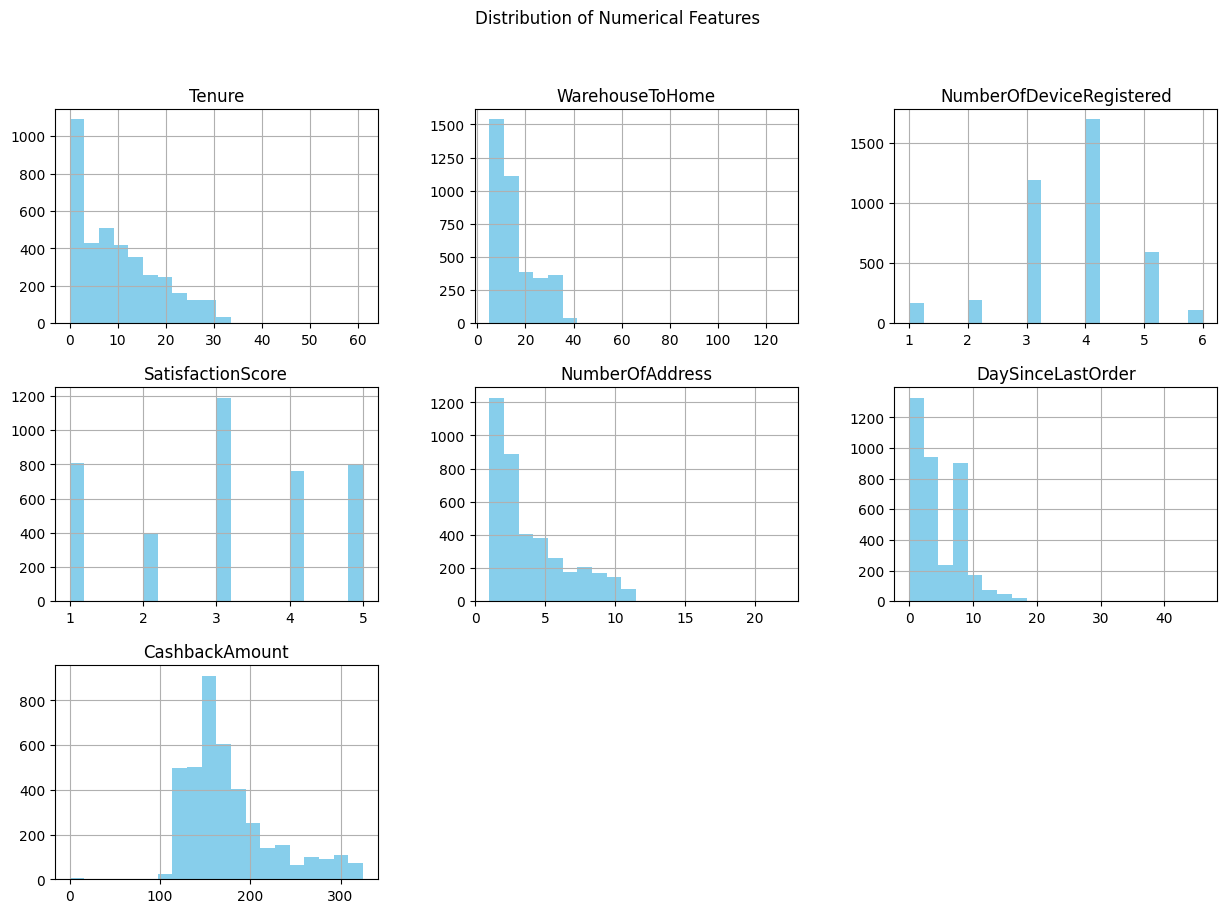

In [4]:
numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                  'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

df[numerical_cols].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


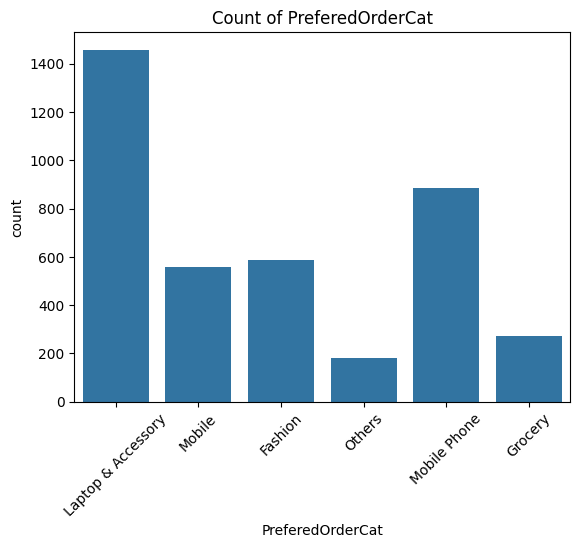

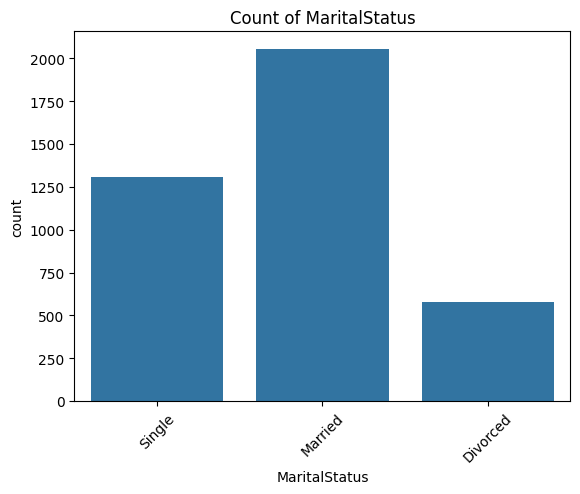

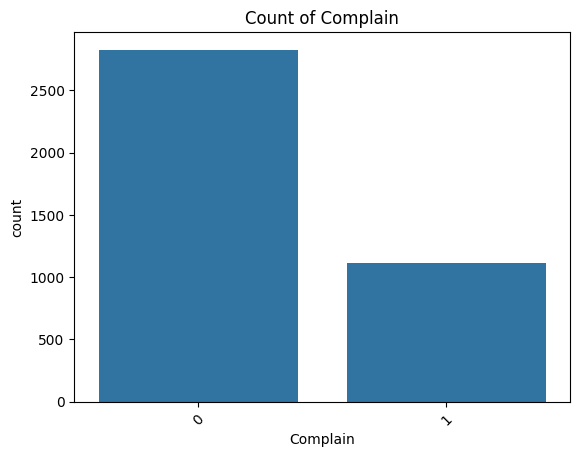

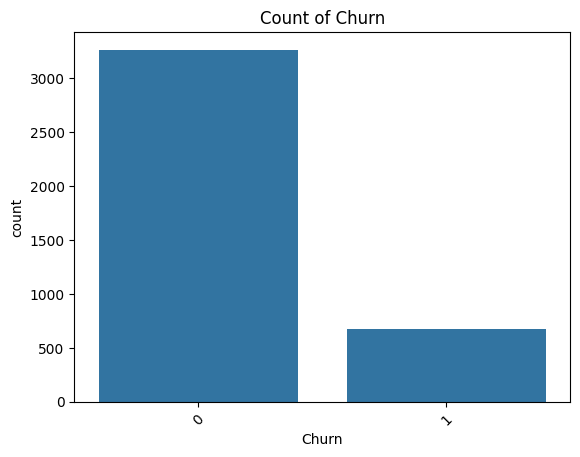

In [6]:
# Plot categorical features
categorical_cols = ['PreferedOrderCat', 'MaritalStatus', 'Complain', 'Churn']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


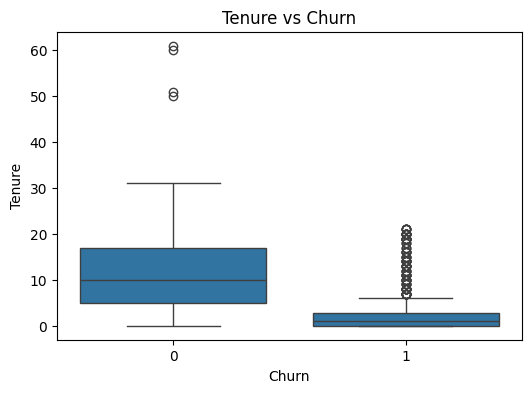

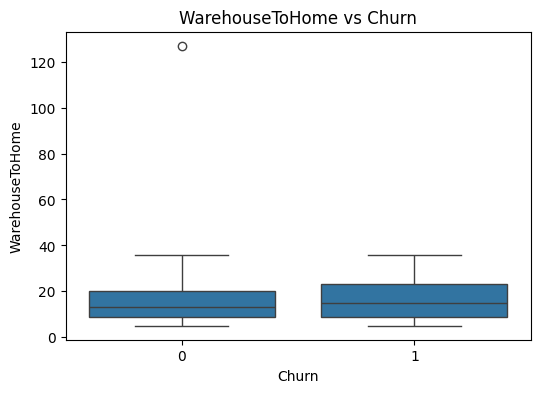

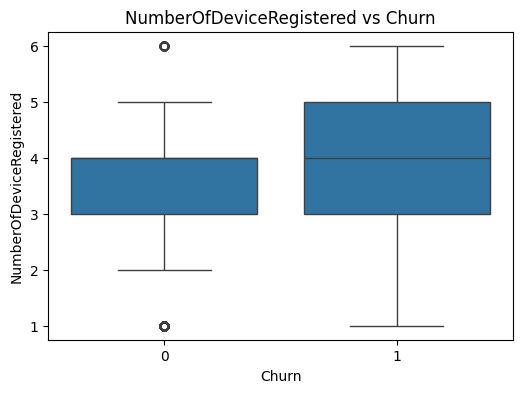

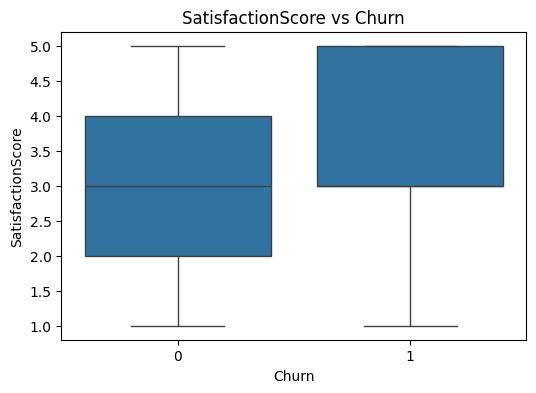

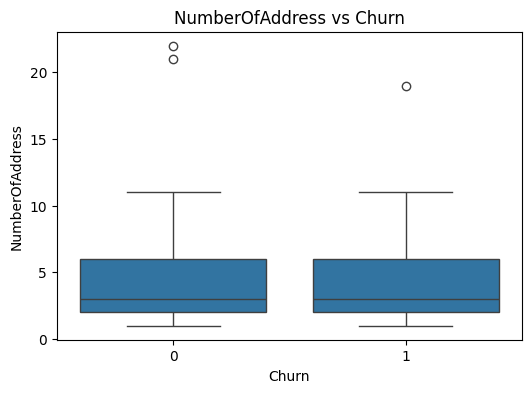

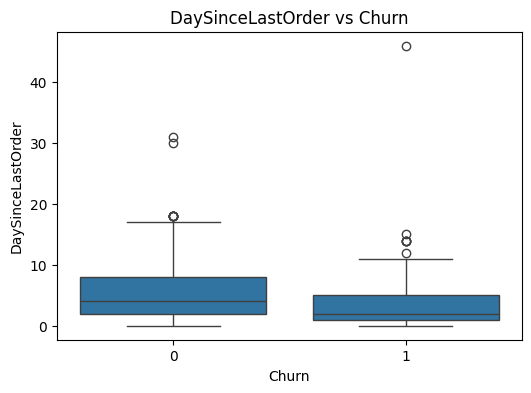

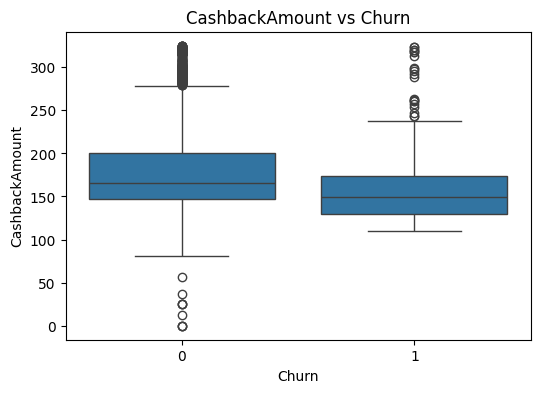

In [8]:
# Numerical features vs Churn (Boxplots)
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


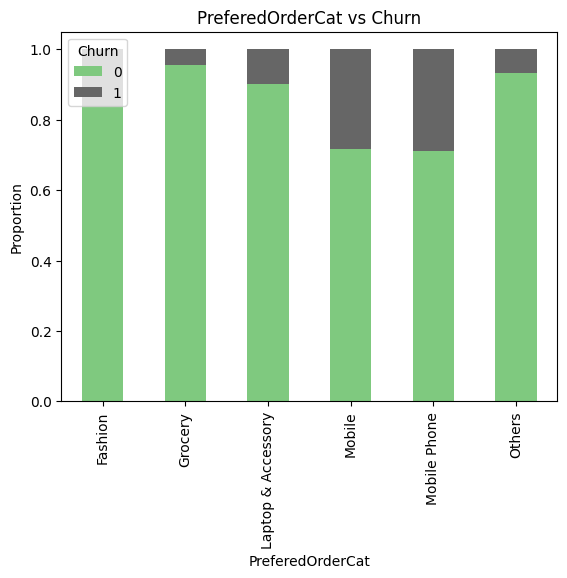

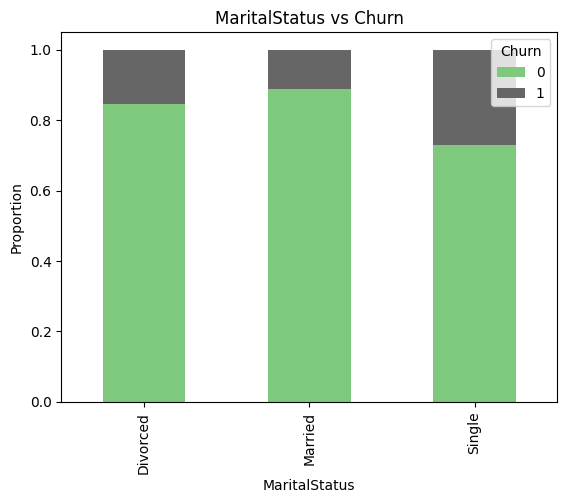

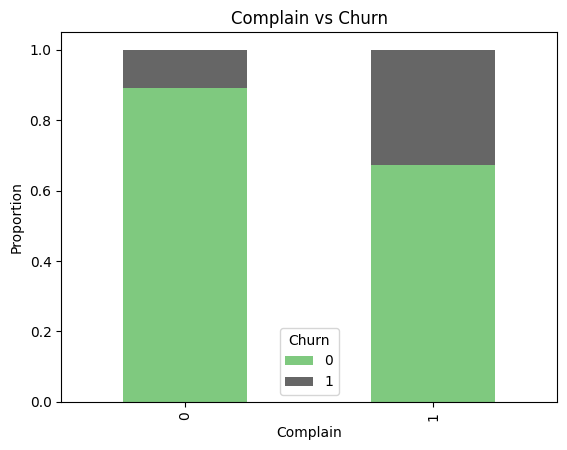

In [9]:
# Categorical features vs Churn (Stacked bars)
for col in ['PreferedOrderCat', 'MaritalStatus', 'Complain']:
    churn_ct = pd.crosstab(df[col], df['Churn'], normalize='index')
    churn_ct.plot(kind='bar', stacked=True, colormap='Accent')
    plt.title(f'{col} vs Churn')
    plt.ylabel("Proportion")
    plt.show()


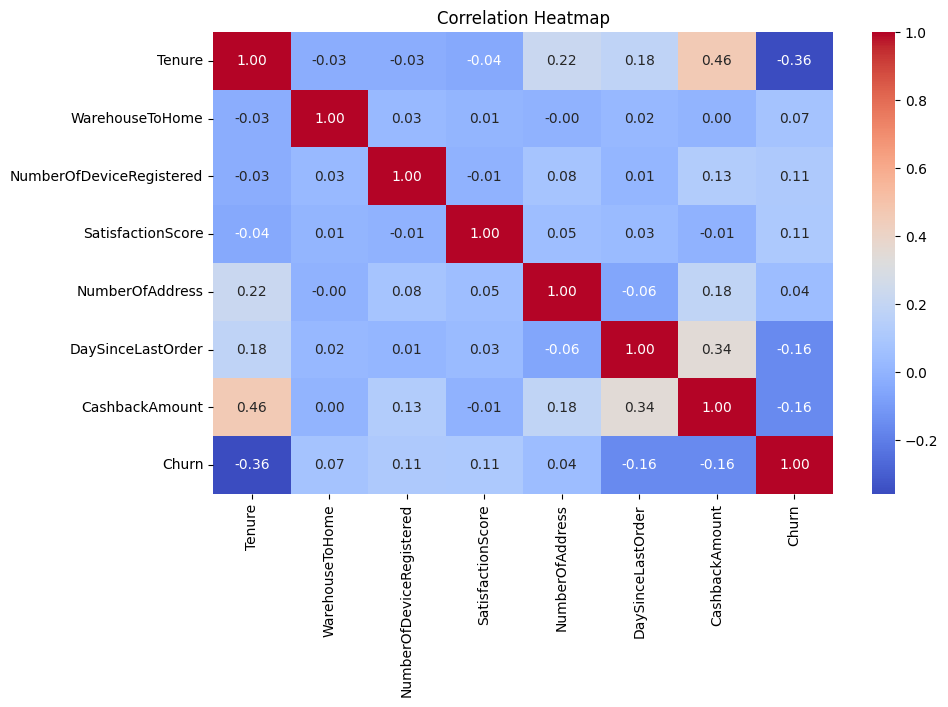

In [10]:
# Only for numerical features
plt.figure(figsize=(10, 6))
corr = df[numerical_cols + ['Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
le = LabelEncoder()

df['PreferedOrderCat'] = le.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
# 'Complain' and 'Churn' may already be 0/1, but just in case:
df['Complain'] = le.fit_transform(df['Complain'])
df['Churn'] = le.fit_transform(df['Churn'])


In [12]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Drop rows with any NaN in features or target
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # make sure y_train matches X_train rows

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       586
           1       0.76      0.41      0.53       108

    accuracy                           0.89       694
   macro avg       0.83      0.69      0.73       694
weighted avg       0.88      0.89      0.87       694



In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       586
           1       0.87      0.83      0.85       108

    accuracy                           0.96       694
   macro avg       0.92      0.91      0.91       694
weighted avg       0.95      0.96      0.95       694



In [20]:
xgb_clf = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\Aditi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       586
           1       0.83      0.83      0.83       108

    accuracy                           0.95       694
   macro avg       0.90      0.90      0.90       694
weighted avg       0.95      0.95      0.95       694



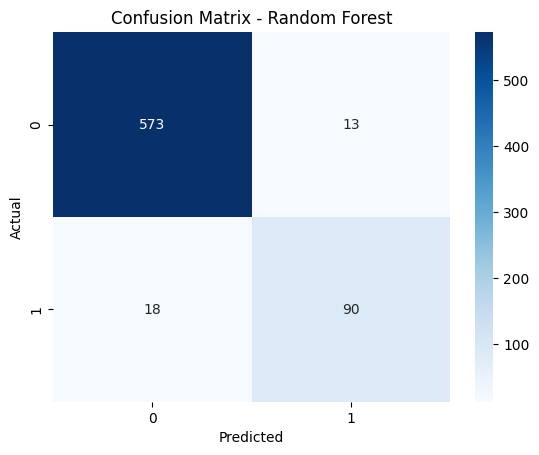

In [21]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


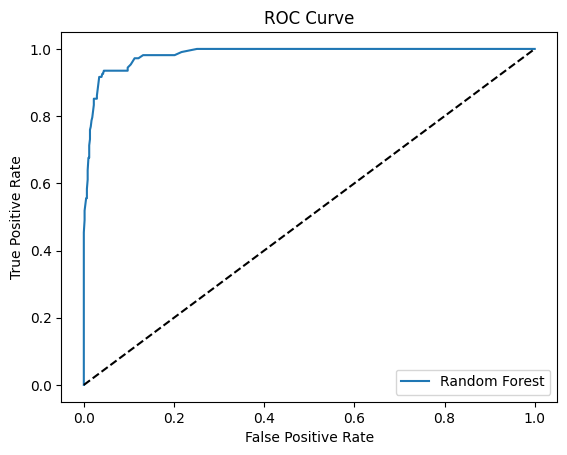

AUC Score: 0.9840728100113767


In [22]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))
